In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
train_df = pd.read_csv('mytrain2.csv')
test_df = pd.read_csv('mytest2.csv')

In [3]:
labelencoder = LabelEncoder()
train_df['thal'] = labelencoder.fit_transform(train_df['thal'])
test_df['thal'] = labelencoder.transform(test_df['thal'])


In [4]:
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=133, shuffle= True)
train_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
171,42,1,2,120,295,0,0,162,0,0.0,1,0,1,0
57,52,1,4,108,233,1,0,147,0,0.1,1,3,2,0
99,44,1,4,112,290,0,2,153,0,0.0,1,1,1,1
190,51,0,4,130,305,0,0,142,1,1.2,2,0,2,1
45,57,0,2,130,236,0,2,174,0,0.0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,54,1,3,125,273,0,2,152,0,0.5,3,1,1,0
1,58,1,2,120,284,0,2,160,0,1.8,2,0,1,0
56,37,1,3,130,250,0,0,187,0,3.5,3,0,1,0
136,54,0,3,160,201,0,0,163,0,0.0,1,1,1,0


In [5]:
val_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
38,66,0,3,146,278,0,2,152,0,0.0,2,1,1,0
30,41,0,2,126,306,0,0,163,0,0.0,1,0,1,0
178,60,1,4,125,258,0,2,141,1,2.8,2,1,2,0
79,45,1,4,142,309,0,2,147,1,0.0,2,3,2,1
119,45,1,2,128,308,0,2,170,0,0.0,1,0,1,0
73,58,0,4,100,248,0,2,122,0,1.0,2,0,1,0
72,71,0,3,110,265,1,2,130,0,0.0,1,1,1,0
13,51,1,4,140,298,0,0,122,1,4.2,2,3,2,1
10,45,0,2,130,234,0,2,175,0,0.6,2,0,1,0
221,56,1,2,120,236,0,0,178,0,0.8,1,0,1,0


In [6]:
train_labels = train_data.pop('target')
val_labels = val_data.pop('target')

In [7]:
def create_model():
    input1 = tf.keras.Input(shape=(13,))
    hidden1 = tf.keras.layers.Dense(units = 12, activation='relu')(input1)
    hidden2 = tf.keras.layers.Dense(units = 6, activation='relu')(hidden1)
    output1 = tf.keras.layers.Dense(units = 2, activation='softmax')(hidden2)
    model = tf.keras.models.Model(inputs = input1, outputs = output1)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [8]:
def create_model1():
    model = tf.keras.Sequential([
    tf.keras.Input(shape = (13,)),
    tf.keras.layers.Dense(units = 12, activation='relu'),
    tf.keras.layers.Dense(units = 6, activation='relu'),
    tf.keras.layers.Dense(units = 2, activation='softmax')
  ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [9]:
def create_hybrid_model():
    input1 = tf.keras.Input(shape=(13,))
    hidden1 = tf.keras.layers.Dense(units = 6, activation='relu')(input1)
    hidden2 = tf.keras.layers.Dense(units = 6, activation='relu')(input1)
    merge = tf.keras.layers.concatenate([hidden1,hidden2])
    hidden3 = tf.keras.layers.Dense(units = 3, activation='relu')(merge)
    output1 = tf.keras.layers.Dense(units = 2, activation='softmax')(hidden3)
    model = tf.keras.models.Model(inputs = input1, outputs = output1)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model
    

In [10]:
def create_model_multiple():
    input1 = tf.keras.Input(shape=(13,), name = 'I1')
    input2 = tf.keras.Input(shape=(6,), name = 'I2')
    hidden1 = tf.keras.layers.Dense(units = 4, activation='relu')(input1)
    hidden2 = tf.keras.layers.Dense(units = 4, activation='relu')(input2)
    merge = tf.keras.layers.concatenate([hidden1, hidden2])
    hidden3 = tf.keras.layers.Dense(units = 3, activation='relu')(merge)
    output1 = tf.keras.layers.Dense(units = 2, activation='softmax', name ='O1')(hidden3)
    output2 = tf.keras.layers.Dense(units = 2, activation='softmax', name = 'O2')(hidden3)
    model = tf.keras.models.Model(inputs = [input1,input2], outputs = [output1,output2])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model
    
    

In [11]:
new_train_data = train_data.loc[:,['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs']]
new_val_data = val_data.loc[:,['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs']]
new_val_labels = val_data['exang']
new_target_label = train_data['exang']
new_train_data

,age,sex,cp,trestbps,chol,fbs
171,42,1,2,120,295,0
57,52,1,4,108,233,1
99,44,1,4,112,290,0
190,51,0,4,130,305,0
45,57,0,2,130,236,0
...,...,...,...,...,...,...
182,54,1,3,125,273,0
1,58,1,2,120,284,0
56,37,1,3,130,250,0
136,54,0,3,160,201,0


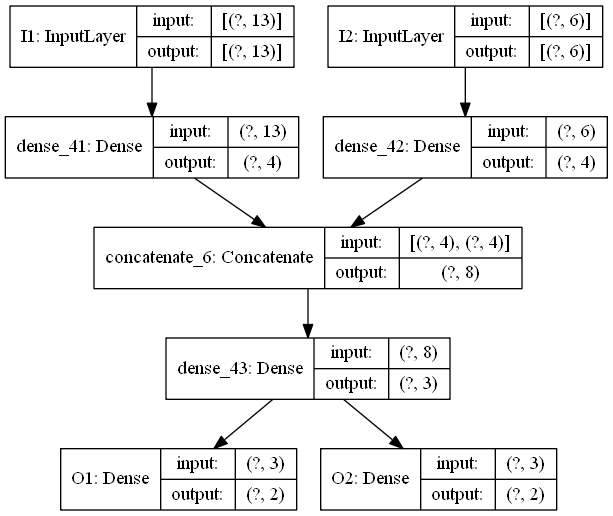

In [22]:
# model = create_hybrid_model()

# model1 = create_hybrid_model()
# model2 = create_model()
# model3 = create_model1()

# inputs = tf.keras.Input(shape=(13,))
# y1 = model1(inputs)
# y2 = model2(inputs)
# y3 = model3(inputs)
# outputs = tf.keras.layers.average([y1,y2,y3])
# model = tf.keras.Model(inputs=inputs, outputs=outputs)
# model.compile(optimizer='adam',
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])

model = create_model_multiple()

tf.keras.utils.plot_model(model, 'my_first_model.png', show_shapes=True)
# model.summary()

In [23]:
print(train_data.shape)
print(new_train_data.shape)
print(train_labels.shape)
print(new_target_label.shape)

(192, 13)
(192, 6)
(192,)
(192,)


In [24]:
history = model.fit({'I1':train_data, 'I2':new_train_data},
                    {'O1':train_labels, 'O2': new_target_label},
                    validation_data=[(val_data,new_val_data),(val_labels, new_val_labels)],
                    epochs=100,
                    verbose = 1)

Epoch 1/100
6/6 [==============================] - 0s 40ms/step - loss: 137.3973 - O1_loss: 61.3622 - O2_loss: 76.0350 - O1_accuracy: 0.7344 - O2_accuracy: 0.6615 - val_loss: 0.0000e+00 - val_O1_loss: 0.0000e+00 - val_O2_loss: 0.0000e+00 - val_O1_accuracy: 0.0000e+00 - val_O2_accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 0s 21ms/step - loss: 127.7477 - O1_loss: 57.0054 - O2_loss: 70.7423 - O1_accuracy: 0.7344 - O2_accuracy: 0.6615 - val_loss: 0.0000e+00 - val_O1_loss: 0.0000e+00 - val_O2_loss: 0.0000e+00 - val_O1_accuracy: 0.0000e+00 - val_O2_accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 22ms/step - loss: 117.4218 - O1_loss: 52.7414 - O2_loss: 64.6804 - O1_accuracy: 0.7344 - O2_accuracy: 0.6615 - val_loss: 0.0000e+00 - val_O1_loss: 0.0000e+00 - val_O2_loss: 0.0000e+00 - val_O1_accuracy: 0.0000e+00 - val_O2_accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 22ms/step - loss: 107.5438 - O1_loss: 48.8290 - O2_l

Epoch 29/100
6/6 [==============================] - 0s 22ms/step - loss: 14.0690 - O1_loss: 6.6169 - O2_loss: 7.4522 - O1_accuracy: 0.6198 - O2_accuracy: 0.6094 - val_loss: 0.0000e+00 - val_O1_loss: 0.0000e+00 - val_O2_loss: 0.0000e+00 - val_O1_accuracy: 0.0000e+00 - val_O2_accuracy: 0.0000e+00
Epoch 30/100
6/6 [==============================] - 0s 23ms/step - loss: 13.3402 - O1_loss: 6.2241 - O2_loss: 7.1161 - O1_accuracy: 0.6094 - O2_accuracy: 0.5990 - val_loss: 0.0000e+00 - val_O1_loss: 0.0000e+00 - val_O2_loss: 0.0000e+00 - val_O1_accuracy: 0.0000e+00 - val_O2_accuracy: 0.0000e+00
Epoch 31/100
6/6 [==============================] - 0s 22ms/step - loss: 12.5329 - O1_loss: 5.7937 - O2_loss: 6.7392 - O1_accuracy: 0.5781 - O2_accuracy: 0.5990 - val_loss: 0.0000e+00 - val_O1_loss: 0.0000e+00 - val_O2_loss: 0.0000e+00 - val_O1_accuracy: 0.0000e+00 - val_O2_accuracy: 0.0000e+00
Epoch 32/100
6/6 [==============================] - 0s 22ms/step - loss: 11.7139 - O1_loss: 5.4127 - O2_loss: 6.

Epoch 57/100
6/6 [==============================] - 0s 22ms/step - loss: 1.5011 - O1_loss: 0.7182 - O2_loss: 0.7829 - O1_accuracy: 0.7500 - O2_accuracy: 0.6615 - val_loss: 0.0000e+00 - val_O1_loss: 0.0000e+00 - val_O2_loss: 0.0000e+00 - val_O1_accuracy: 0.0000e+00 - val_O2_accuracy: 0.0000e+00
Epoch 58/100
6/6 [==============================] - 0s 22ms/step - loss: 1.4800 - O1_loss: 0.7088 - O2_loss: 0.7713 - O1_accuracy: 0.7552 - O2_accuracy: 0.6562 - val_loss: 0.0000e+00 - val_O1_loss: 0.0000e+00 - val_O2_loss: 0.0000e+00 - val_O1_accuracy: 0.0000e+00 - val_O2_accuracy: 0.0000e+00
Epoch 59/100
6/6 [==============================] - 0s 24ms/step - loss: 1.4616 - O1_loss: 0.6998 - O2_loss: 0.7618 - O1_accuracy: 0.7552 - O2_accuracy: 0.6562 - val_loss: 0.0000e+00 - val_O1_loss: 0.0000e+00 - val_O2_loss: 0.0000e+00 - val_O1_accuracy: 0.0000e+00 - val_O2_accuracy: 0.0000e+00
Epoch 60/100
6/6 [==============================] - 0s 22ms/step - loss: 1.4340 - O1_loss: 0.6885 - O2_loss: 0.7455

Epoch 85/100
6/6 [==============================] - 0s 21ms/step - loss: 1.2617 - O1_loss: 0.6096 - O2_loss: 0.6521 - O1_accuracy: 0.7344 - O2_accuracy: 0.6510 - val_loss: 0.0000e+00 - val_O1_loss: 0.0000e+00 - val_O2_loss: 0.0000e+00 - val_O1_accuracy: 0.0000e+00 - val_O2_accuracy: 0.0000e+00
Epoch 86/100
6/6 [==============================] - 0s 23ms/step - loss: 1.2596 - O1_loss: 0.6085 - O2_loss: 0.6511 - O1_accuracy: 0.7344 - O2_accuracy: 0.6510 - val_loss: 0.0000e+00 - val_O1_loss: 0.0000e+00 - val_O2_loss: 0.0000e+00 - val_O1_accuracy: 0.0000e+00 - val_O2_accuracy: 0.0000e+00
Epoch 87/100
6/6 [==============================] - 0s 22ms/step - loss: 1.2579 - O1_loss: 0.6074 - O2_loss: 0.6505 - O1_accuracy: 0.7344 - O2_accuracy: 0.6510 - val_loss: 0.0000e+00 - val_O1_loss: 0.0000e+00 - val_O2_loss: 0.0000e+00 - val_O1_accuracy: 0.0000e+00 - val_O2_accuracy: 0.0000e+00
Epoch 88/100
6/6 [==============================] - 0s 24ms/step - loss: 1.2561 - O1_loss: 0.6065 - O2_loss: 0.6496

In [21]:
history = model.fit(train_data,
                    train_labels,
                    validation_data=(val_data, val_labels),
                    epochs=100,
                    verbose = 1)


Epoch 1/100
6/6 [==============================] - 0s 46ms/step - loss: 9.8709 - accuracy: 0.7344 - val_loss: 8.3293 - val_accuracy: 0.7292
Epoch 2/100
6/6 [==============================] - 0s 17ms/step - loss: 8.1058 - accuracy: 0.7344 - val_loss: 6.3601 - val_accuracy: 0.7292
Epoch 3/100
6/6 [==============================] - 0s 17ms/step - loss: 6.1488 - accuracy: 0.7344 - val_loss: 4.4769 - val_accuracy: 0.7292
Epoch 4/100
6/6 [==============================] - 0s 16ms/step - loss: 4.3238 - accuracy: 0.7344 - val_loss: 2.6129 - val_accuracy: 0.7292
Epoch 5/100
6/6 [==============================] - 0s 17ms/step - loss: 2.4452 - accuracy: 0.7292 - val_loss: 0.9494 - val_accuracy: 0.7917
Epoch 6/100
6/6 [==============================] - 0s 18ms/step - loss: 1.2199 - accuracy: 0.7292 - val_loss: 0.3614 - val_accuracy: 0.8125
Epoch 7/100
6/6 [==============================] - 0s 16ms/step - loss: 0.6062 - accuracy: 0.6094 - val_loss: 0.5754 - val_accuracy: 0.5000
Epoch 8/100
6/6 [===

6/6 [==============================] - 0s 15ms/step - loss: 0.5435 - accuracy: 0.7344 - val_loss: 0.4266 - val_accuracy: 0.7292
Epoch 60/100
6/6 [==============================] - 0s 8ms/step - loss: 0.5412 - accuracy: 0.7344 - val_loss: 0.4316 - val_accuracy: 0.7292
Epoch 61/100
6/6 [==============================] - 0s 15ms/step - loss: 0.5410 - accuracy: 0.7344 - val_loss: 0.4300 - val_accuracy: 0.7292
Epoch 62/100
6/6 [==============================] - 0s 17ms/step - loss: 0.5395 - accuracy: 0.7344 - val_loss: 0.4286 - val_accuracy: 0.7292
Epoch 63/100
6/6 [==============================] - 0s 16ms/step - loss: 0.5386 - accuracy: 0.7344 - val_loss: 0.4307 - val_accuracy: 0.7292
Epoch 64/100
6/6 [==============================] - 0s 17ms/step - loss: 0.5396 - accuracy: 0.7344 - val_loss: 0.4224 - val_accuracy: 0.7292
Epoch 65/100
6/6 [==============================] - 0s 19ms/step - loss: 0.5412 - accuracy: 0.7344 - val_loss: 0.4169 - val_accuracy: 0.7292
Epoch 66/100
6/6 [=========